<a href="https://colab.research.google.com/github/andreyppsc/tensorflow-notebooks/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural networks in tensor flow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable base on some other combination of variables... predicting a number

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.7.0


## Creating some data to view and fit

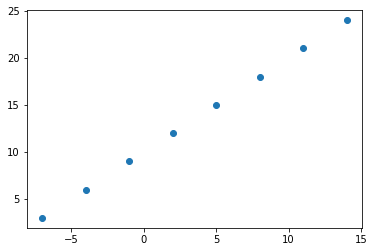

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Vizualize
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction demo
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), tf.float32)
y = tf.cast(tf.constant(y), tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

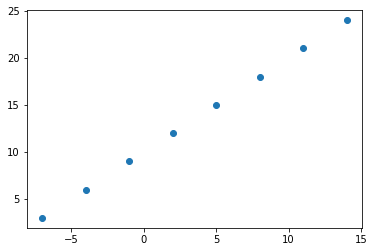

In [12]:
plt.scatter(X, y)

## Steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model
2. **Compile a model** - define the loss function (the function which tells our model how wrong it is) and the optmizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can you to interpret the performance of our model)
3. **Fitting the model** - letting the model try to find patterns between X and y

In [13]:
# Set random seet
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, -1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 723ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
# Check our X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [16]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create our model
1. **Creating** a model - here we might add more layers, increase the number of hidden units (neurons) within each layer, change the activation function of each layer
2. **Compiling** a model - here we might change the optimization function or perhaps the **learning** rate of the opt. function
3. **Fitting** a model - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give more examples to learn from)

In [20]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 303ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 10.4411 - mae: 10.4411
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.3086 - mae: 10.3086
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1761 - mae: 10.1761
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0436 - mae: 10.0436
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9111 - mae: 9.9111
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7786 - mae: 9.7786
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6461 - mae: 9.6461
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5136 - mae: 9.5136
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3811 - mae: 9.3811
Epoch 11/100
1/1 [==============================] - 0s 7ms/st

In [22]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
# Prediction

model.predict([17.0])

array([[29.901575]], dtype=float32)

In [38]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 377ms/step - loss: 13.4370 - mae: 13.4370
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7093 - mae: 12.7093
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.9862 - mae: 11.9862
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.2648 - mae: 11.2648
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5425 - mae: 10.5425
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.8168 - mae: 9.8168
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.0853 - mae: 9.0853
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3451 - mae: 8.3451
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5932 - mae: 7.5932
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8588 - mae: 6.8588
Epoch 11/100
1/1 [==============================] - 0s 9ms/step 

In [39]:
# 4. Predict
model.predict([17.0])

array([[26.571156]], dtype=float32)

learning rate is the most important hyperparameter in any neural network

## Evaluating a model

In practice a typical workflow you go through wehn building neural network is#

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

> "visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like
* The model - what does the model look like
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)

In [41]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [42]:
# Make lables for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

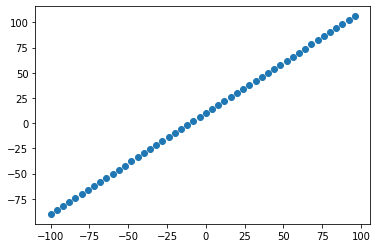

In [44]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* Training set - the model learns from this data (70%-80% of the total data you have available)
* Validation set - the model gets tuned on this data - this is 10% to 15% of the available data
* Test set - the model gets evaluated on this data to test what it has learned - 10%-15% of total data

In [45]:
# Check the lenght of how many samples we have
len(X)

50

In [49]:
# Split the data into train and test sets
X_train = X[:40] # first 40
y_train = y[:40]
X_test = X[40:] # last 10
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

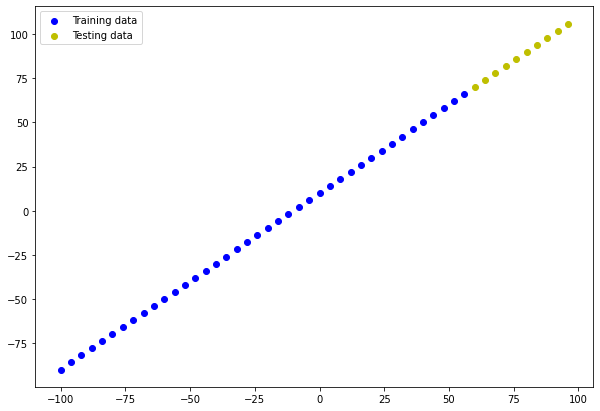

In [59]:
# Visualize

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="y", label="Testing data")
plt.legend();

In [62]:
# Create
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit
#model.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

In [98]:
# Defining the input shape
tf.random.set_seed(42)

# Create
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="one_of_many")

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [99]:
model.summary()

Model: "one_of_many"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params = total number of parameters in the model
* Trainable params = parameters (patterns) the model can update as it trains
* Non-trainable params = these parameters are not update during training - when you bring in already learned parameters from other model during transfer learing

In [100]:
model.fit(tf.expand_dims(X_train, -1), y_train, epochs=100, verbose=0)

In [101]:
model.summary()

Model: "one_of_many"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


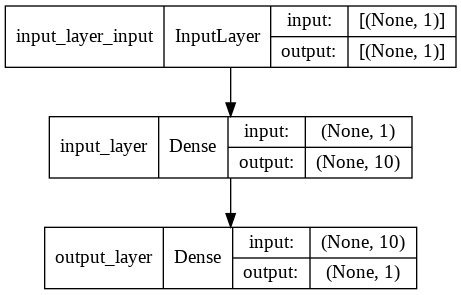

In [102]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [103]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 72.42797 ],
       [ 76.58641 ],
       [ 80.74485 ],
       [ 84.90329 ],
       [ 89.06173 ],
       [ 93.22018 ],
       [ 97.378624],
       [101.537056],
       [105.695496],
       [109.853935]], dtype=float32)

In [104]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [105]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
    Plots and compares predictions
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="y", label="Test data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

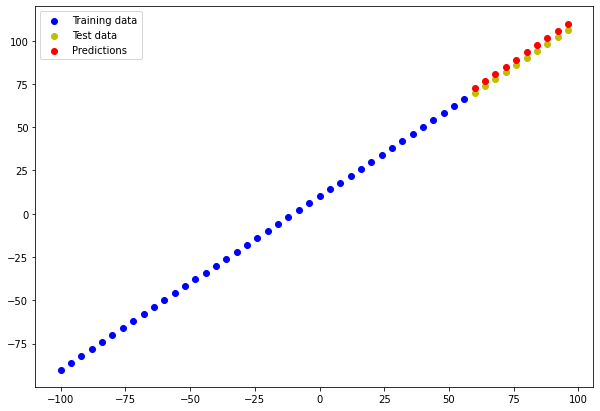

In [106]:
plot_predictions()

### Evaluating our predictions with regression evalution metrics